# HW2: дедлайн 28.02.2025 23:59

In [1]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns
import pandas as pd
import networkx as nx
import numpy as np
from time import sleep

**Граф для нашего задания**

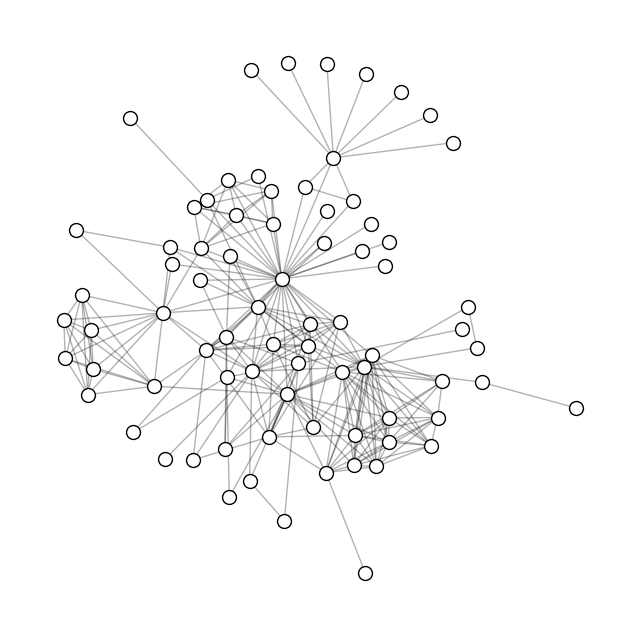

In [27]:
lesG = nx.Graph(nx.les_miserables_graph().edges)
lesG = nx.convert_node_labels_to_integers(lesG)
lespos = nx.kamada_kawai_layout(lesG)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(lesG, lespos, node_color='white', edgecolors='black', node_size=100)
nx.draw_networkx_edges(lesG, lespos, alpha=0.3)
plt.axis('off')
plt.show()

**Задание 1 (2 балла)**

Научимся считать модулярность

In [3]:
def modularity(A, communities):
    m = A.sum() / 2
    res = (A - expected_edges(A, m)) * delta(A, communities)
    return res.sum() / 2 / m

In [20]:
def expected_edges(A, m):
    return np.outer(A.sum(axis=1), A.sum(axis=1)) / (2 * m)

In [21]:
# проверим себя
A = nx.to_numpy_array(lesG)
m = lesG.number_of_edges()
ee = expected_edges(A, m)

assert ee.shape == A.shape
assert np.all(0 <= ee)

In [22]:
def delta(A, communities):
    n = A.shape[0]
    delta_matrix = np.zeros((n, n), dtype=int)
    for community in communities:
        indices = np.array(community, dtype=int)
        delta_matrix[np.ix_(indices, indices)] = 1
    return delta_matrix

In [23]:
# проверим себя
A = nx.to_numpy_array(lesG)
communities = [np.arange(0, 10), np.arange(10, len(lesG))]
kd = delta(A, communities)

assert np.all(kd[8] == [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])
assert np.all(kd[13] == [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Задание 2 (2 балла)**

Реализуйте алгоритм Гирван-Ньюмена для обнаружения сообществ в графе

In [24]:
def girvan_newman(G, n):
    labels = np.zeros((n, len(G)))
    for division in range(n):
        remove_bridges(G)
        for i, cc in enumerate(nx.connected_components(G)):
            labels[division, list(cc)] = i
    return labels

def remove_bridges(G):
    initial_components = nx.number_connected_components(G)
    while initial_components == nx.number_connected_components(G):
        edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
        G.remove_edge(*max(edge_betweenness_centrality, key=edge_betweenness_centrality.get))

In [25]:
# проверим себя
labels = girvan_newman(lesG, 4)
assert labels.shape == (4, 77)
assert np.all(labels[0] == [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

assert np.all(labels[1] == [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 1.,
        2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
        2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

assert np.all(labels[2] == [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 1.,
        2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
        2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
        3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

assert np.all(labels[3] == [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 1.,
        2., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
        1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 4.,
        4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])


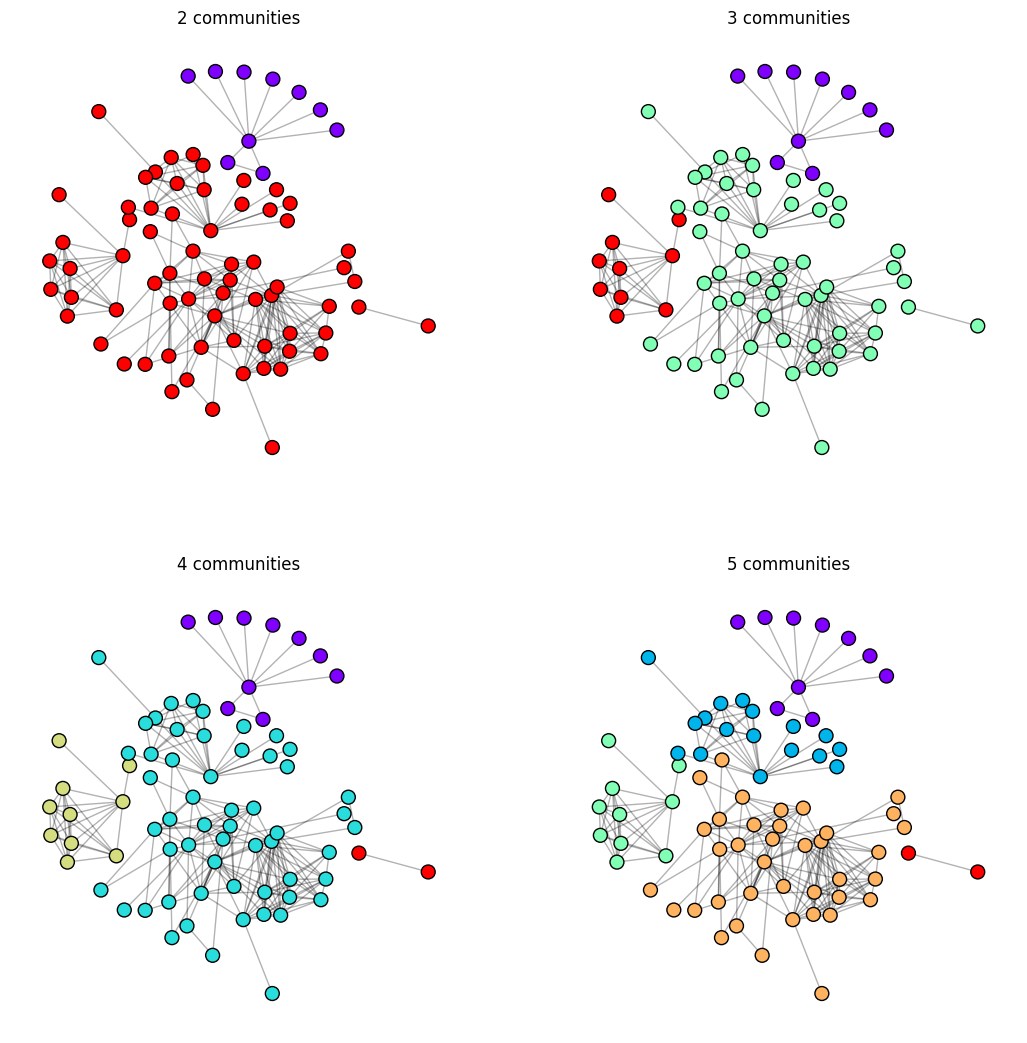

In [26]:
plt.figure(figsize=(13, 13))
for i in range(labels.shape[0]):
    plt.subplot(2, 2, i+1)
    nx.draw_networkx_nodes(
        lesG,
        lespos,
        cmap=plt.cm.rainbow,
        node_color=labels[i],
        node_size=100,
        edgecolors='black'
    )
    nx.draw_networkx_edges(lesG, lespos, alpha=0.3)
    plt.title('{} communities'.format(i+2))
    plt.axis('off')

**Задание 3 (2 балла)**

Определите наилучший параметр $n$ для нашей функции girvan_newman.

Подсказка: нужно построить какой-то график

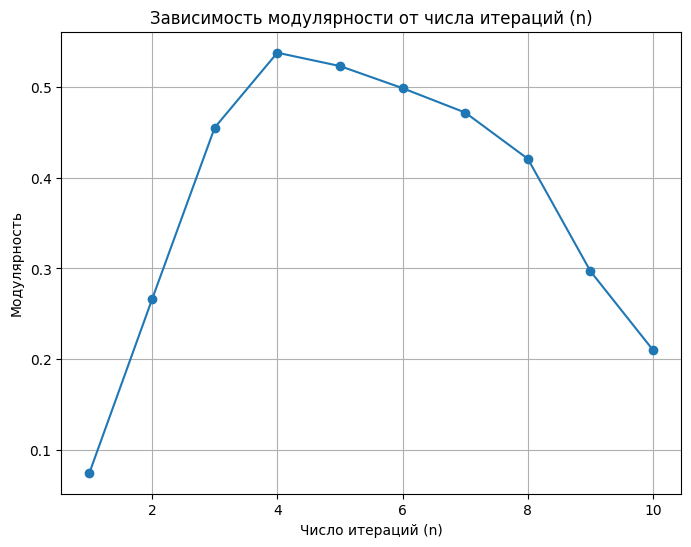

Наилучший параметр n - 4


In [28]:
A = nx.to_numpy_array(lesG)
modularities = []

for n in range(1, 11):
    last_label = girvan_newman(lesG, n)[-1]
    communities = []
    for com in np.unique(last_label):
        communities.append(np.where(last_label == com)[0].tolist())
    modularities.append(modularity(A, communities))

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), modularities, marker='o')
plt.xlabel("Число итераций (n)")
plt.ylabel("Модулярность")
plt.title("Зависимость модулярности от числа итераций (n)")
plt.grid(True)
plt.show()

print(f'Наилучший параметр n - {range(1, 11)[np.argmax(modularities)]}')

**Задание 4 (2 балла)**

Пишем метод распространение меток (label propagation)

In [14]:
import random
from collections import Counter

def sync_update_labels(graph, labels):
    new_labels = {}

    for vertex in graph.nodes():
        neighbor_labels = [labels[neighbor] for neighbor in graph.neighbors(vertex)]
        if not neighbor_labels:
            new_labels[vertex] = labels[vertex]
        else:
            counts = Counter(neighbor_labels)
            max_count = max(counts.values())
            candidates = [label for label, count in counts.items() if count == max_count]
            new_labels[vertex] = random.choice(candidates)

    return [new_labels[node] for node in graph.nodes()]

In [15]:
def plot_propagation(G, update_method, n=50, pause=1):
    pos=nx.kamada_kawai_layout(G)
    labels = np.array(list(G.nodes))
    for i in range(n):
        clear_output(wait=True)
        labels = update_method(G, labels)
        plt.figure(figsize=(8, 8))
        nx.draw_networkx_nodes(
            G,
            pos=pos,
            node_color=labels,
            cmap=plt.cm.rainbow,
            node_size=100,
            edgecolors='black'
        )
        nx.draw_networkx_edges(G, pos=pos, alpha=0.2)
        plt.axis('off')
        plt.title('Iteration {}/{}'.format(i+1, n))
        plt.show()
        sleep(pause)

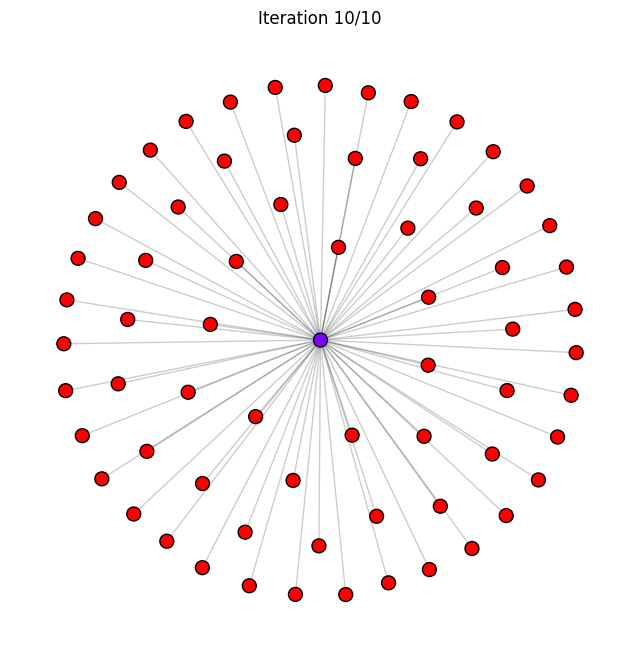

In [16]:
plot_propagation(nx.star_graph(66), sync_update_labels, 10)

Устал писать тесты :(((
Тут алгоритм не сойдётся и получится вот такое:

![image-2.png](attachment:image-2.png)

**Задание 5 (2 балла)**

Пишем метод распространение меток (label propagation) только теперь асинхронный

In [17]:
def async_update_labels(graph, labels):
    new_labels = labels.copy()
    nodes = list(graph.nodes())
    random.shuffle(nodes)

    for node in nodes:
        neighbor_labels = [new_labels[neighbor] for neighbor in graph.neighbors(node) if neighbor in new_labels]
        if not neighbor_labels:
            continue
        label_counts = Counter(neighbor_labels)
        max_count = max(label_counts.values())
        candidates = [label for label, count in label_counts.items() if count == max_count]
        new_labels[node] = random.choice(candidates)

    return new_labels

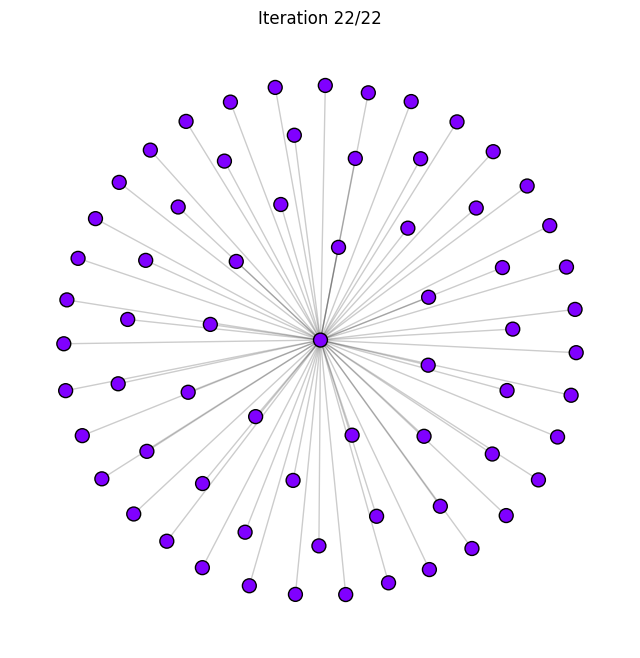

In [18]:
plot_propagation(nx.star_graph(66), async_update_labels, 22, 1)

А тут сойдёться и граф будем одним сообществом. То есть вот так:

![image-2.png](attachment:image-2.png)